In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  #Standardisation
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import learning_curve

from sklearn.ensemble import RandomForestRegressor


In [9]:
#Importer le fichier

df = pd.read_csv("World_happiness_ML.csv",
                index_col = "Unnamed: 0")
df.head()

,Ladder_score,PIB_habitant,Social_support,Healthy_life_expectancy,Freedom,Generosity,Corruption,Positive_affect,Negative_affect,Region_Central and Eastern Europe,Region_Commonwealth of Independent States,Region_East Asia,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_North America and ANZ,Region_South Asia,Region_Southeast Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,False,False,False,False,False,False,True,False,False,False
1,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,False,False,False,False,False,False,True,False,False,False
2,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,False,False,False,False,False,False,True,False,False,False
3,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,False,False,False,False,False,False,True,False,False,False
4,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,False,False,False,False,False,False,True,False,False,False


In [10]:
#Valeurs manquantes

df.isna().sum()

Ladder_score                                 0
PIB_habitant                                 0
Social_support                               0
Healthy_life_expectancy                      0
Freedom                                      0
Generosity                                   0
Corruption                                   0
Positive_affect                              0
Negative_affect                              0
Region_Central and Eastern Europe            0
Region_Commonwealth of Independent States    0
Region_East Asia                             0
Region_Latin America and Caribbean           0
Region_Middle East and North Africa          0
Region_North America and ANZ                 0
Region_South Asia                            0
Region_Southeast Asia                        0
Region_Sub-Saharan Africa                    0
Region_Western Europe                        0
dtype: int64

In [11]:
#Séparer les jeux de données en un groupe train et un test

feats = df.drop("Ladder_score", axis = 1)  #Mettre dans X les variables explicatives
target = df["Ladder_score"]  #Mettre dans y la variable cible

#Faire un groupe train et un test
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size = 0.25, random_state = 42) 


In [12]:
#Normalisation des données

#sc = StandardScaler()

#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)


In [13]:
#Groupement et instanciation modele
rfr = RandomForestRegressor(n_estimators = 50,                 # Nombre d'estimateurs (arbres) dans le modèle
              max_depth = 20,                    # Profondeur maximale des arbres
              min_samples_split = 5,         # Nombre minimal d'échantillons requis pour diviser un nœud
              min_samples_leaf = 4,               # Nombre minimal d'échantillons requis pour être une feuille
              max_features = 'sqrt', # Nombre maximal de caractéristiques à considérer pour la division d'un nœud
              bootstrap = False,
                            random_state=42)
rfr.fit(X_train, y_train)


RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=5, n_estimators=50,
                      random_state=42)

In [24]:

# Définir les paramètres à optimiser
param_grid = {
    "n_estimators" : np.arange(49, 51, 1),                 # Nombre d'estimateurs (arbres) dans le modèle
    "max_depth" : np.arange(19, 21, 1),                    # Profondeur maximale des arbres
    "min_samples_split" : np.arange(4, 6, 1),         # Nombre minimal d'échantillons requis pour diviser un nœud
    "min_samples_leaf" : np.arange(3, 5, 1),               # Nombre minimal d'échantillons requis pour être une feuille
    "max_features" : ["sqrt", "log2"], # Nombre maximal de caractéristiques à considérer pour la division d'un nœud
    "bootstrap" : [False, True]
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Effectuer la recherche par grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print("Meilleurs paramètres:", grid_search.best_params_)

# Obtenir le meilleur modèle
best_rfr = grid_search.best_estimator_

# Prédire sur les données de test avec le meilleur modèle
y_pred = best_rfr.predict(X_test)



#Quantifier l'erreur du modèle
print('Coefficient de détermination du modèle sur train:', best_rfr.score(X_train, y_train))
print('Coefficient de détermination du modèle sur test:', best_rfr.score(X_test, y_test))

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("mse :", mse)
print("rmse :", rmse)
print("mae :", mae)

Meilleurs paramètres: {'bootstrap': False, 'max_depth': 19, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 50}
Coefficient de détermination du modèle sur train: 0.9801380297725949
Coefficient de détermination du modèle sur test: 0.8978681393229592
mse : 0.12241856778370169
rmse : 0.34988364892304086
mae : 0.2631526685494062


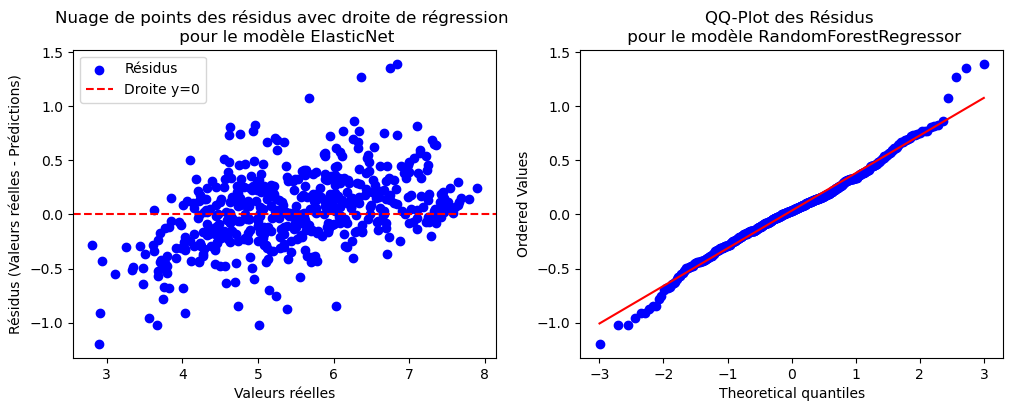

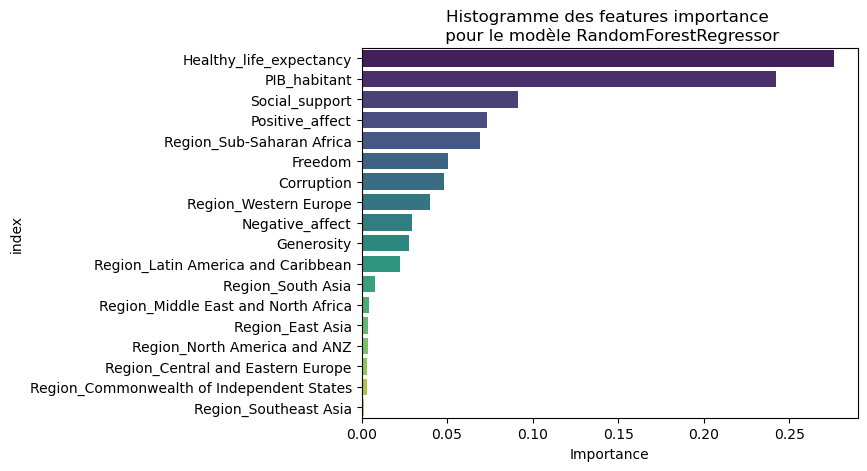

,index,Importance
0,Healthy_life_expectancy,0.276111
1,PIB_habitant,0.242361
2,Social_support,0.091310
3,Positive_affect,0.073456
4,Region_Sub-Saharan Africa,0.069202
5,Freedom,0.050657
6,Corruption,0.048479
7,Region_Western Europe,0.040292
8,Negative_affect,0.029696
9,Generosity,0.027972


In [25]:
# Créer une DataFrame avec les noms des variables
"""coefficients_df_elast = pd.DataFrame({
    "Variable": feats.columns,  # Noms des variables
    "Coefficient": best_rfr.coef_  # Coefficients associés
})"""


residuals = y_test - y_pred

plt.figure(figsize = (12,4))
plt.subplot(121)

# Tracer le nuage de points des résidus avec la droite de régression
plt.scatter(y_test, residuals, label='Résidus', c ="blue")
plt.axhline(y=0, color='r', linestyle='--', label='Droite y=0')
plt.title("Nuage de points des résidus avec droite de régression \n pour le modèle ElasticNet")
plt.xlabel("Valeurs réelles")
plt.ylabel("Résidus (Valeurs réelles - Prédictions)")
plt.legend()


#Afficher le QQplot

plt.subplot(122)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot des Résidus \n pour le modèle RandomForestRegressor")
plt.show()


#Afficher les features importance et ses coefficients

feat_importances = pd.DataFrame(best_rfr.feature_importances_, index=feats.columns, columns=["Importance"])
feat_importances_sorted = feat_importances.sort_values(by='Importance', ascending=False)

# Use reset_index to convert the index into a column for Seaborn plotting
feat_importances_sorted.reset_index(inplace=True)

# Use the column name you used for the index on the y-axis in sns.barplot
sns.barplot(y=feat_importances_sorted["index"], x="Importance", data=feat_importances_sorted, palette="viridis")

plt.title("Histogramme des features importance \n pour le modèle RandomForestRegressor")
plt.show()

display(feat_importances_sorted)


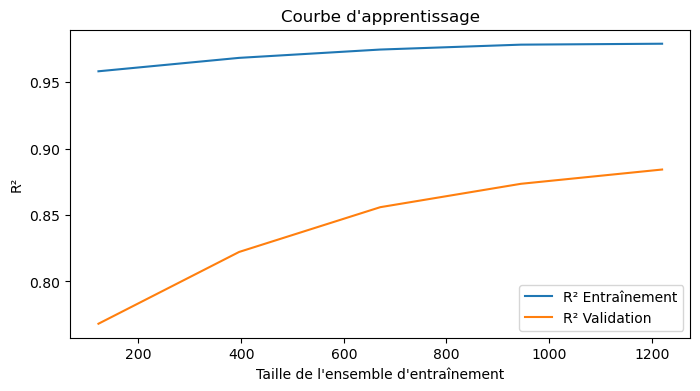

In [26]:
#Afficher la courbe d'apprentissage

# Augmenter la taille de l'ensemble d'entraînement
increased_size = int(3 * len(X_train))
    
train_sizes, train_scores, test_scores = learning_curve(
        best_rfr, X_train[:increased_size], y_train[:increased_size], cv=5, scoring='r2'
    )

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 4))
plt.plot(train_sizes, train_scores_mean, label='R² Entraînement')
plt.plot(train_sizes, test_scores_mean, label='R² Validation')
plt.xlabel('Taille de l\'ensemble d\'entraînement')
plt.ylabel('R²')
plt.title('Courbe d\'apprentissage')
plt.legend()
plt.show()
